In [1]:
import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt
import math



In [2]:
params = pd.read_csv('params.txt', delimiter ='\t')
training = pd.read_csv('training.txt', delimiter ='\t')
testing = pd.read_csv('testing.txt', delimiter ='\t')

In [3]:
x = np.array(training['x'])
y = np.array(training['y'])
b = 1

n = x.size


In [4]:

# populate training 1 to 5

training_1 = np.array(training['Training set 1'])

training_2 = np.array(training['Training set 2'])

training_3 = np.array(training['Training set 3'])

training_4 = np.array(training['Training set 4'])

training_5 = np.array(training['Training set 5'])


In [5]:
training_set = []
training_set = [training_1, training_2, training_3, training_4, training_5]


In [6]:
weight_set = []

# loop through 10 weights and get the sets
for i in range(10):
    weightU1 = np.array(params.iloc[i, [1,2,3]])
    weightU2 = np.array(params.iloc[i, [4,5,6]])
    weightU3 = np.array(params.iloc[i, [7,8,9]])
    
    # get each weight set i (0, 9)
    weight_set_i = []
    weight_set_i.append(weightU1)
    weight_set_i.append(weightU2)
    weight_set_i.append(weightU3)

    # append weight set i (0, 9) to weight_set
    weight_set.append(weight_set_i)



In [7]:
#learning_rate = float(params.iloc[0, [4]]) 

learningRateList = []

for i in range(4):
    learningRate = float(params.iloc[i, [10]])
    learningRateList.append(learningRate)

    

In [8]:
def sigmoid(x):
    return np.where(
            x >= 0, # condition
            1 / (1 + np.exp(-x)), # For positive values
            np.exp(x) / (1 + np.exp(x)) # For negative values
    )

In [9]:
def isLogBase2(n):
    if (n == 0):
        return False
    while (n != 1):
        if (n % 2 != 0):
            return False
        n = n // 2
 
    return True
    

In [10]:
error_list = []
error_set = []

epoch_set = []
epoch_list = []




for w in range (len(weight_set)):
    for t in range (len(training_set)):
        for l in range(len(learningRateList)):
            print("Learning rate: %s " % learningRateList[l])
            print("Weight set: %s " % (w+1))
            print("Training set: %s " % (t+1)) 
            
         
            print()


            WU1 = weight_set[w][0]
            W01 = WU1[0]
            WA1 = WU1[1]
            WB1 = WU1[2]


            WU2 = weight_set[w][1]
            W02 = WU2[0]
            WA2 = WU2[1]
            WB2 = WU2[2]


            WU3 = weight_set[w][2]
            W0 = WU3[0] 
            W1 = WU3[1]
            W2 = WU3[2]

      

            #file = open("myFile.txt", "a") # for testing and debugging purpose
            file = open("190429166Results1.txt", "a")
            file.write("Learning rate: %s" % (learningRateList[l]) + " \n \n")
            file.write("Weight set: %s" % (w+1) + " | \n")
            file.write("Training set: %s" % (t+1) + " | \n")
            file.close()

           

            for epoch in range(1, 5000):

                Z1 = np.add((np.add(np.dot(x, WA1), np.dot(y,WB1))), np.dot(b, W01))
                U1 = sigmoid(Z1)
                

                
                Z2 = np.add((np.add(np.dot(x, WA2), np.dot(y,WB2))), np.dot(b, W02))
                U2 = sigmoid(Z2)
               



                Z3 = np.add((np.add(np.dot(U1, W1), np.dot(U2,W2))), np.dot(b, W0))
                U3 = sigmoid(Z3)
                

                #backward pass

                E3 =  np.subtract(U3, training_set[t])
                DEO = E3 * U3 * (1-U3)
                mse = np.sum(np.square(E3))/n

                W1_Update = np.dot(DEO, U1) /n
                W2_Update = np.dot(DEO, U2) /n
                W0_Update = np.dot(DEO, b)  /n


                W1 = W1 - learningRateList[l] * W1_Update
                W2 = W2 - learningRateList[l] * W2_Update
                W0 = W0 - learningRateList[l] * W0_Update


                # Hidden layer update

                # Update WA1, WB1

                EU1 = DEO * W1
                DEU1 = EU1 * U1 * (1-U1)

                WA1_Update = np.dot(DEU1, x)/n 
                WB1_Update = np.dot(DEU1, y)/n
                W01_Update = np.dot(DEU1, b)/n

                WA1 = WA1 - learningRateList[l] * WA1_Update
                WB1 = WB1 - learningRateList[l] * WB1_Update
                W01 = W01 - learningRateList[l] * W01_Update



                #Update WA2, WB2

                EU2 = DEO * W2
                DEU2 = EU2 * U2 * (1-U2)

                WA2_Update = np.dot(DEU2, x)
                WB2_Update = np.dot(DEU2, y)
                W02_Update = np.dot(DEU2, b) 

                WA2 = WA2 - 0.1 * WA2_Update
                WB2 = WB2 - 0.1 * WB2_Update
                W02 = W02 - 0.1 * W02_Update
                
                
                   

                if(isLogBase2(epoch)):
                    error_set.append(mse)
                    epoch_set.append(epoch)
                    result = "Epoch %s:|Error:%s" % (epoch, mse)
                   #file = open("myFile.txt", "a") # for testing and debugging purpose
                    file = open("190429166Results1.txt", "a")
                   
                    file.write(result + "\n")
                    file.write("Weight w01, wa1, wb1: %s " % (weight_set[w][0])+ " \n")
                    file.write("Weight w02, wa2, wb2: %s " % (weight_set[w][1])+ " \n")
                    file.write("Weight w0, w1,w2: %s " % (weight_set[w][2])+ " \n\n")
                    
                    
            error_list.append(error_set)
            epoch_list.append(epoch_set)
            error_set = [] 
            epoch_set = []

            file.write("\n")
            file.close()



Learning rate: 0.01 
Weight set: 1 
Training set: 1 

Learning rate: 0.1 
Weight set: 1 
Training set: 1 

Learning rate: 0.5 
Weight set: 1 
Training set: 1 

Learning rate: 1.0 
Weight set: 1 
Training set: 1 

Learning rate: 0.01 
Weight set: 1 
Training set: 2 

Learning rate: 0.1 
Weight set: 1 
Training set: 2 

Learning rate: 0.5 
Weight set: 1 
Training set: 2 

Learning rate: 1.0 
Weight set: 1 
Training set: 2 

Learning rate: 0.01 
Weight set: 1 
Training set: 3 

Learning rate: 0.1 
Weight set: 1 
Training set: 3 

Learning rate: 0.5 
Weight set: 1 
Training set: 3 

Learning rate: 1.0 
Weight set: 1 
Training set: 3 

Learning rate: 0.01 
Weight set: 1 
Training set: 4 

Learning rate: 0.1 
Weight set: 1 
Training set: 4 

Learning rate: 0.5 
Weight set: 1 
Training set: 4 

Learning rate: 1.0 
Weight set: 1 
Training set: 4 

Learning rate: 0.01 
Weight set: 1 
Training set: 5 

Learning rate: 0.1 
Weight set: 1 
Training set: 5 

Learning rate: 0.5 
Weight set: 1 
Traini

Learning rate: 0.5 
Weight set: 8 
Training set: 4 

Learning rate: 1.0 
Weight set: 8 
Training set: 4 

Learning rate: 0.01 
Weight set: 8 
Training set: 5 

Learning rate: 0.1 
Weight set: 8 
Training set: 5 

Learning rate: 0.5 
Weight set: 8 
Training set: 5 

Learning rate: 1.0 
Weight set: 8 
Training set: 5 

Learning rate: 0.01 
Weight set: 9 
Training set: 1 

Learning rate: 0.1 
Weight set: 9 
Training set: 1 

Learning rate: 0.5 
Weight set: 9 
Training set: 1 

Learning rate: 1.0 
Weight set: 9 
Training set: 1 

Learning rate: 0.01 
Weight set: 9 
Training set: 2 

Learning rate: 0.1 
Weight set: 9 
Training set: 2 

Learning rate: 0.5 
Weight set: 9 
Training set: 2 

Learning rate: 1.0 
Weight set: 9 
Training set: 2 

Learning rate: 0.01 
Weight set: 9 
Training set: 3 

Learning rate: 0.1 
Weight set: 9 
Training set: 3 

Learning rate: 0.5 
Weight set: 9 
Training set: 3 

Learning rate: 1.0 
Weight set: 9 
Training set: 3 

Learning rate: 0.01 
Weight set: 9 
Traini

results


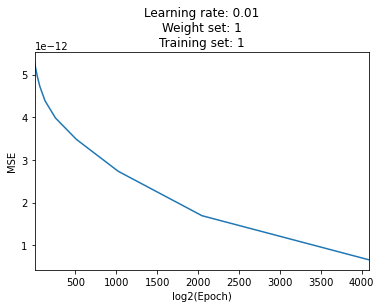

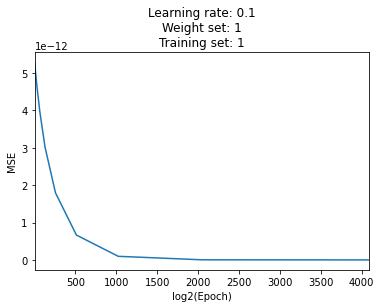

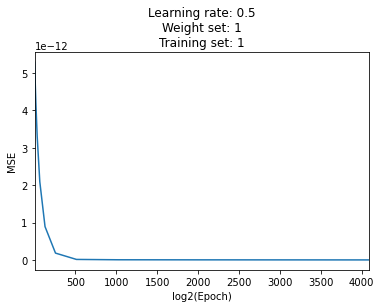

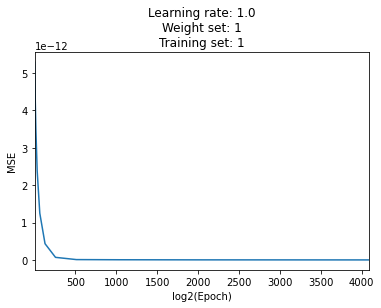

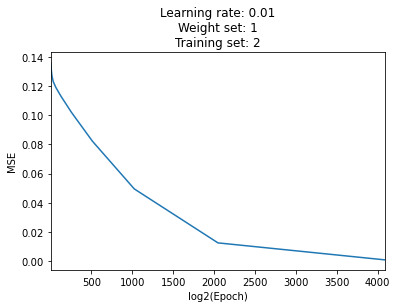

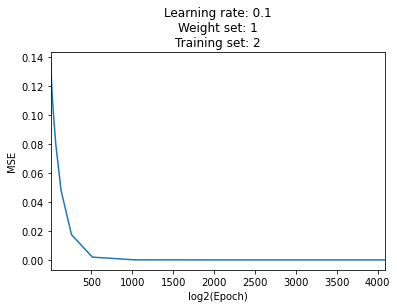

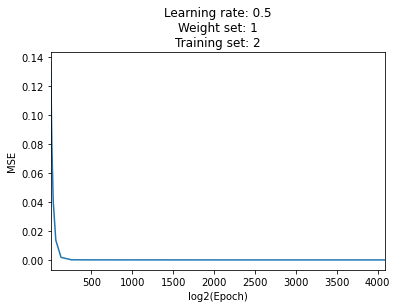

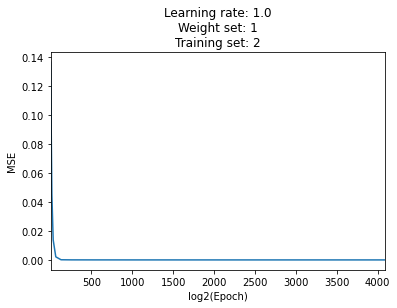

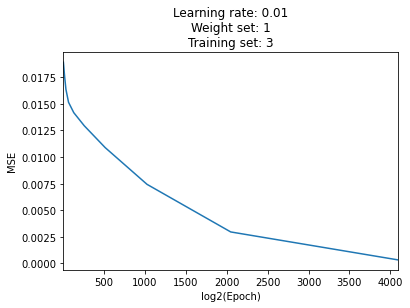

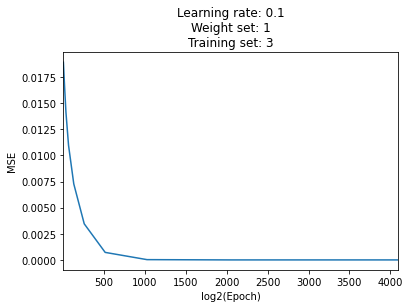

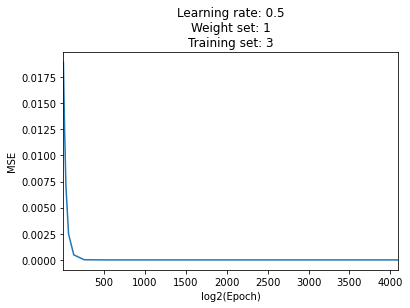

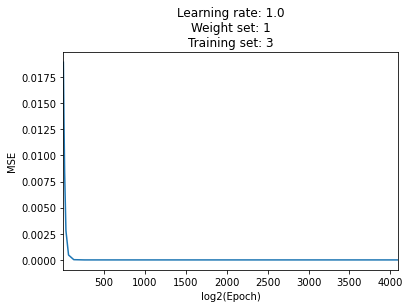

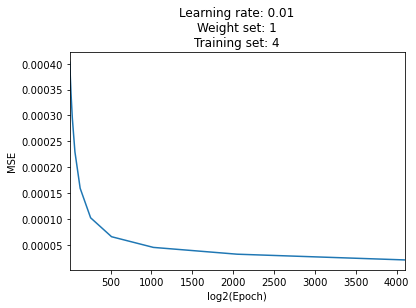

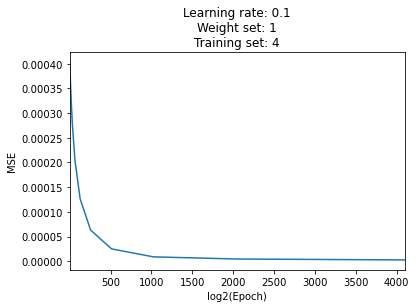

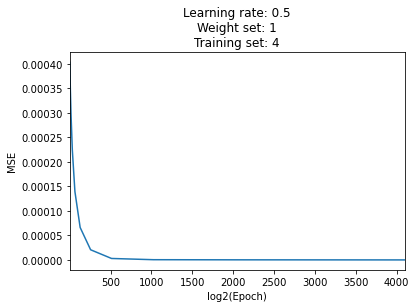

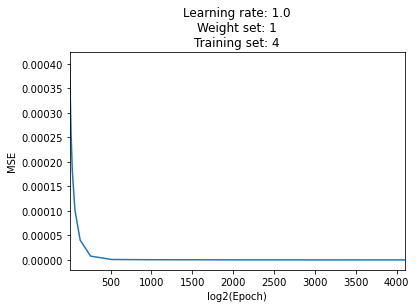

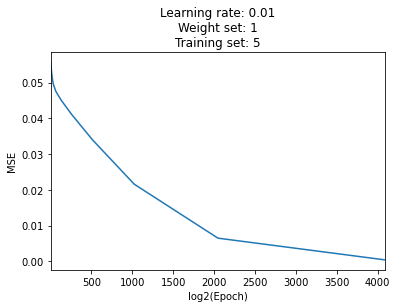

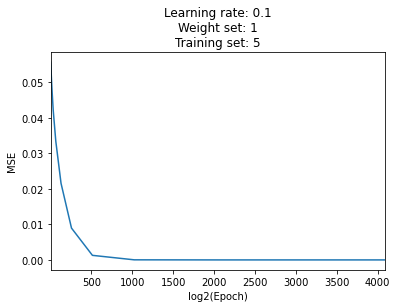

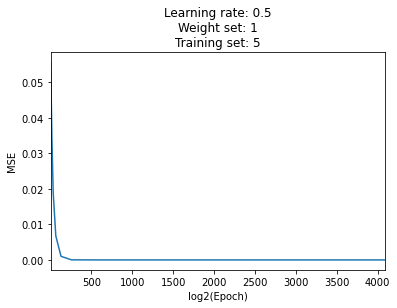

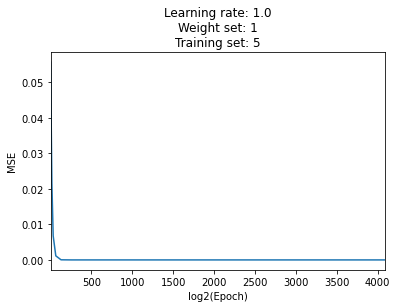

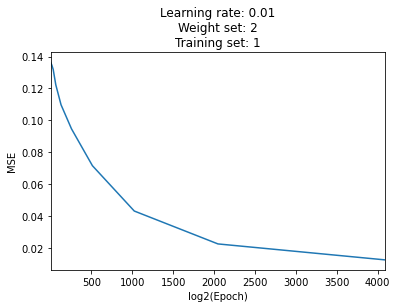

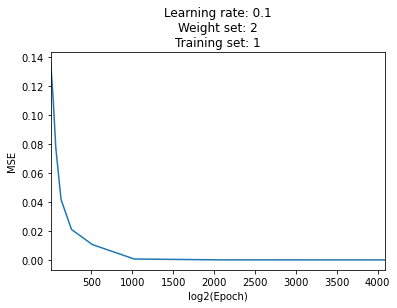

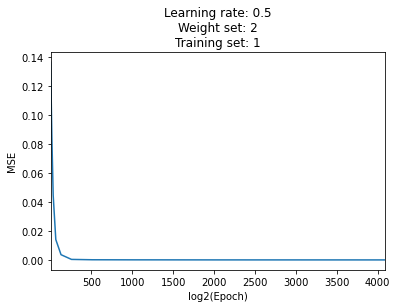

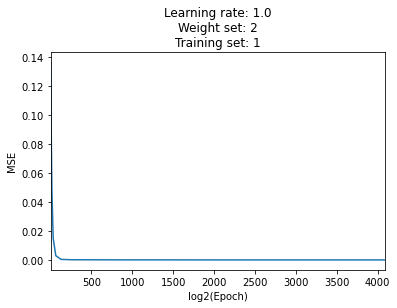

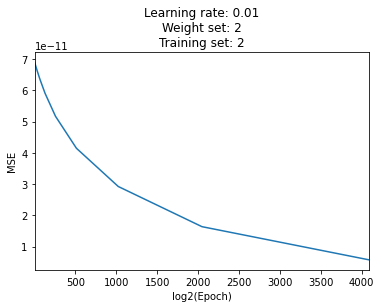

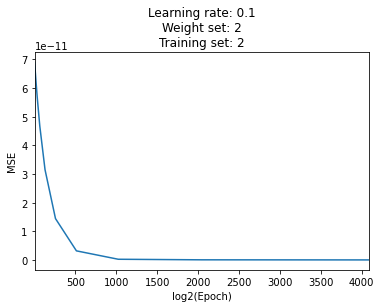

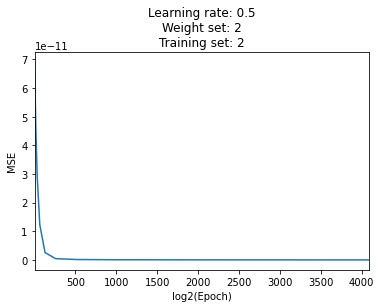

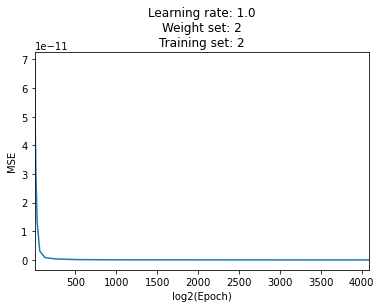

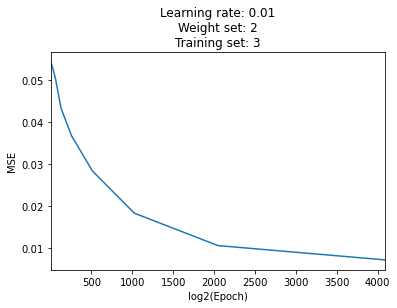

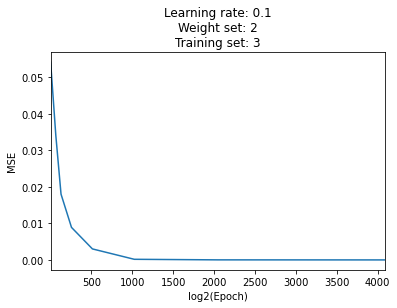

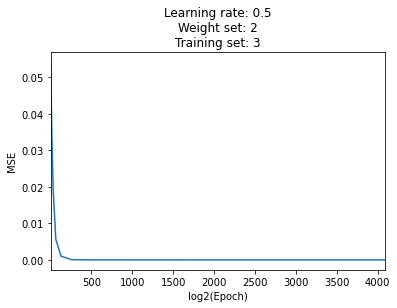

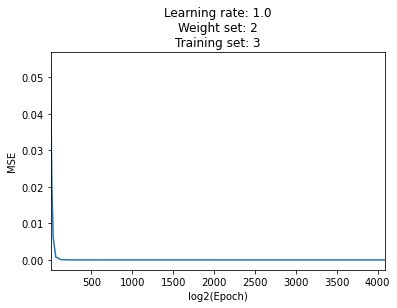

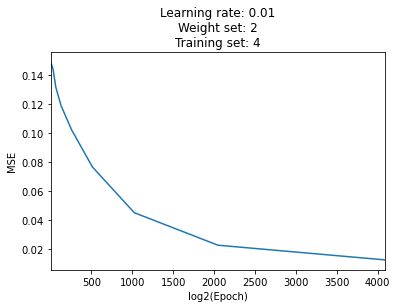

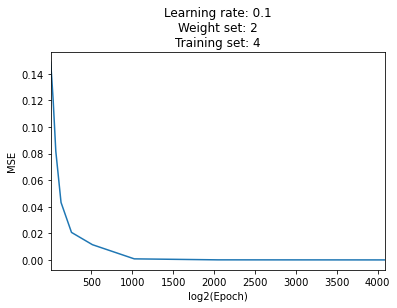

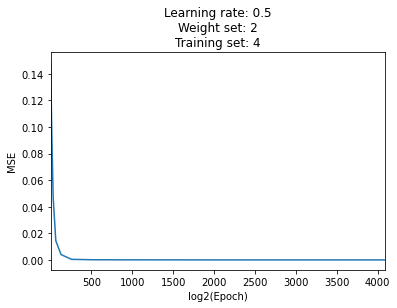

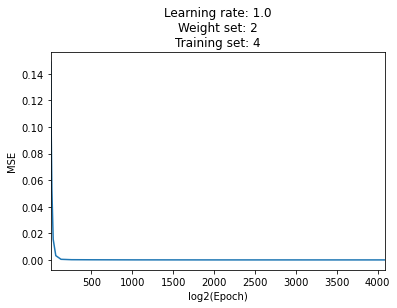

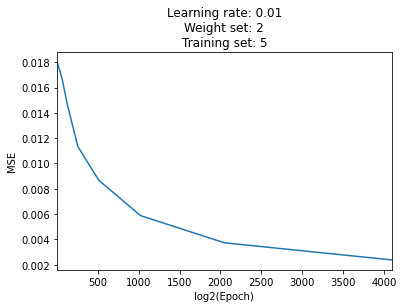

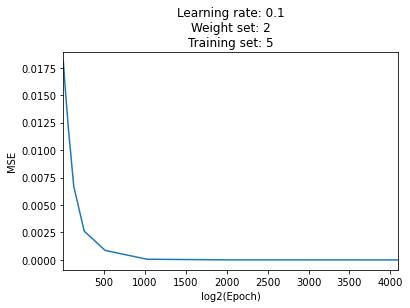

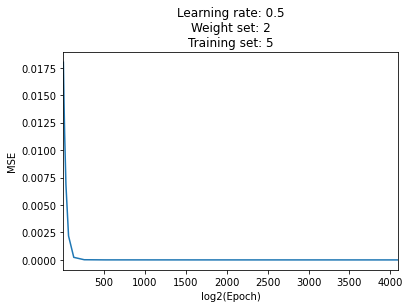

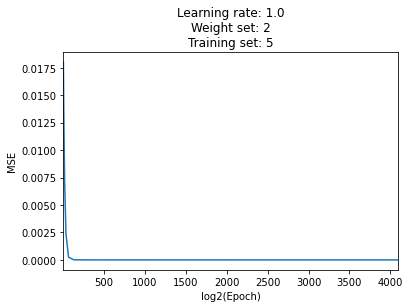

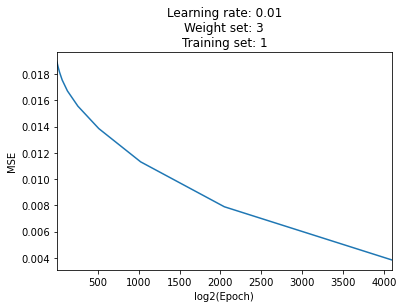

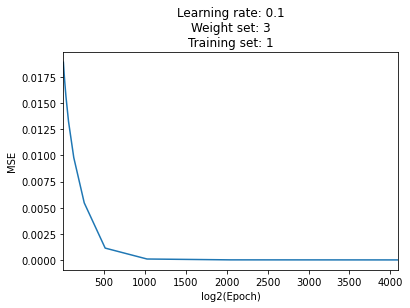

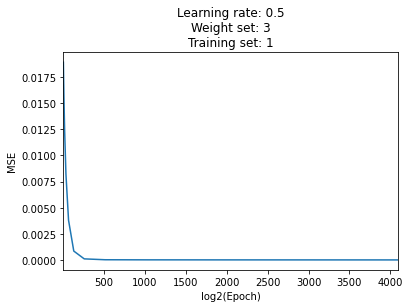

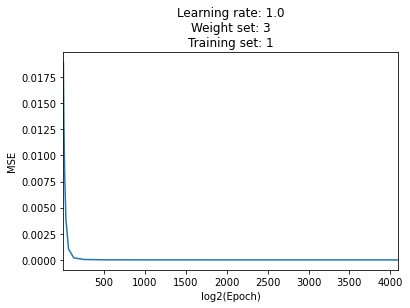

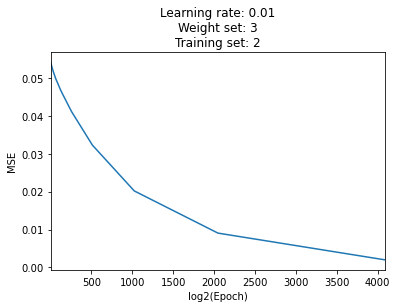

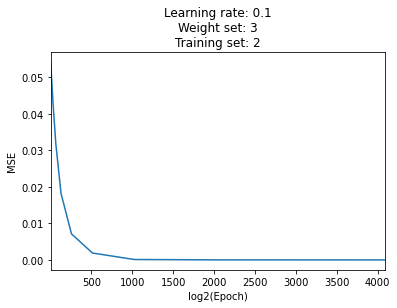

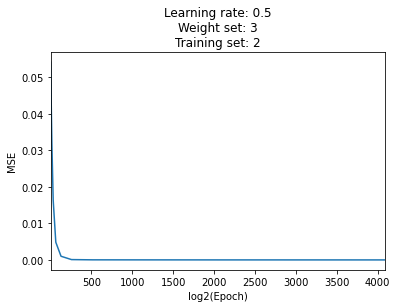

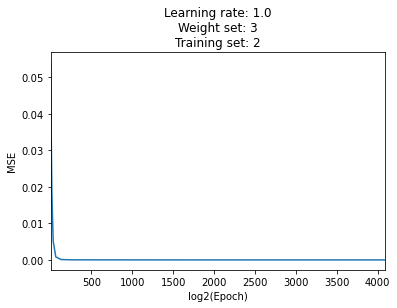

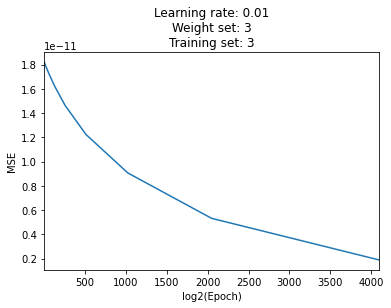

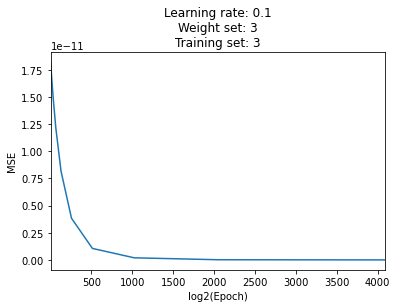

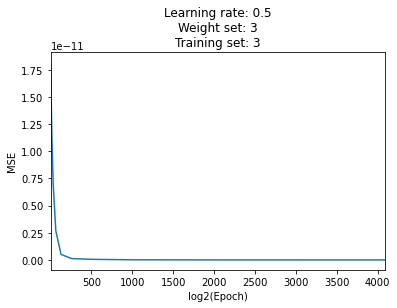

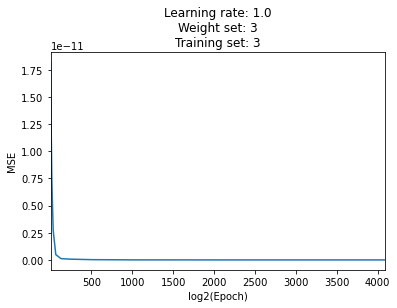

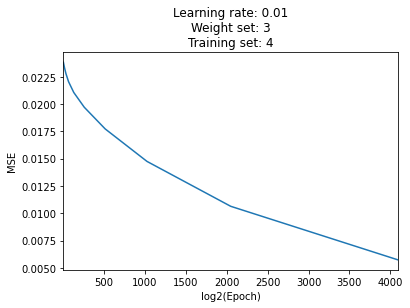

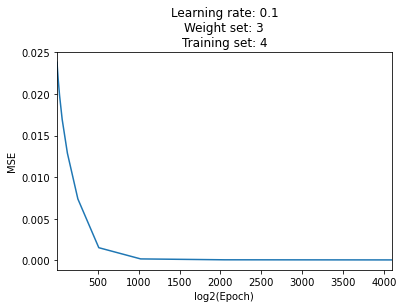

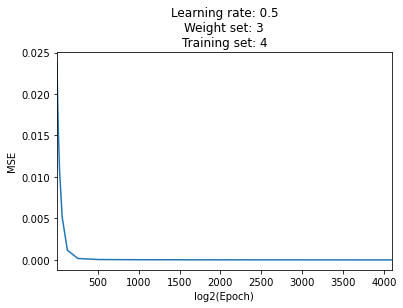

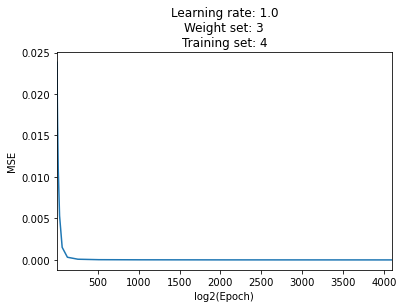

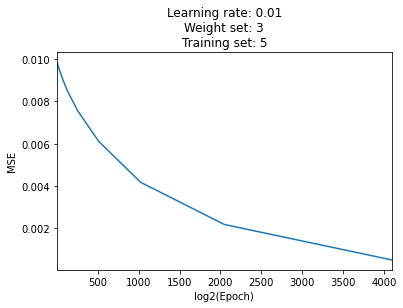

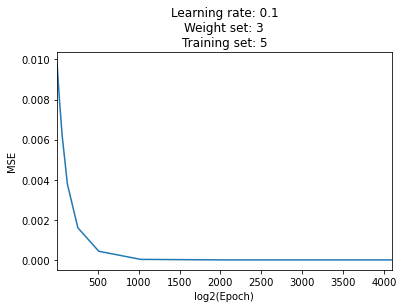

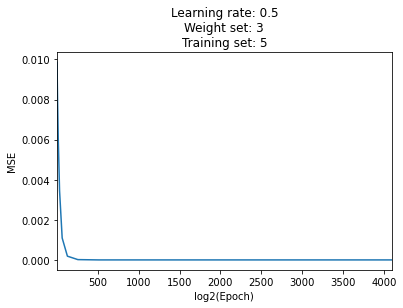

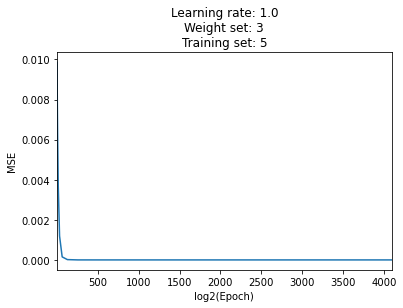

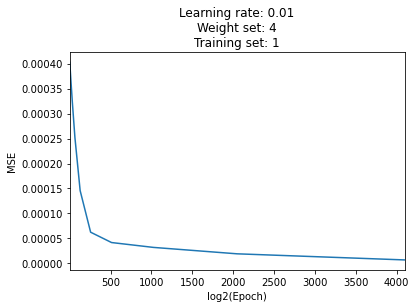

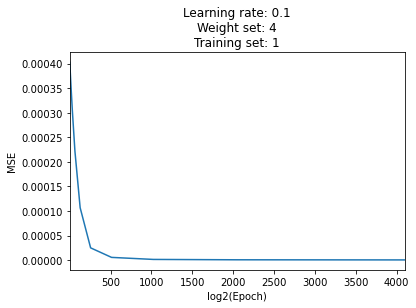

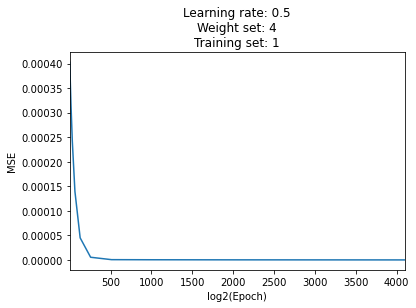

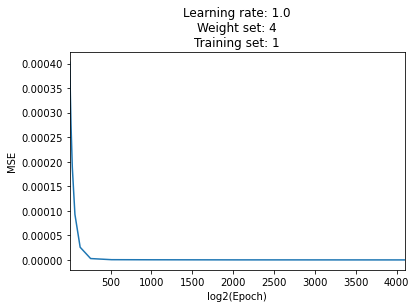

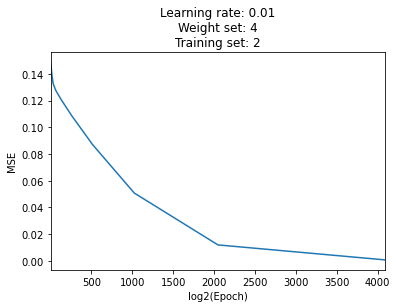

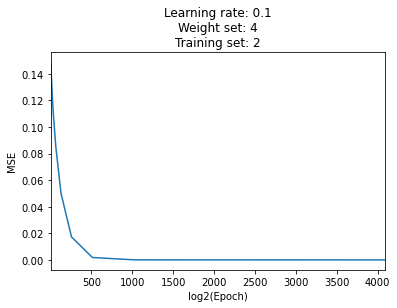

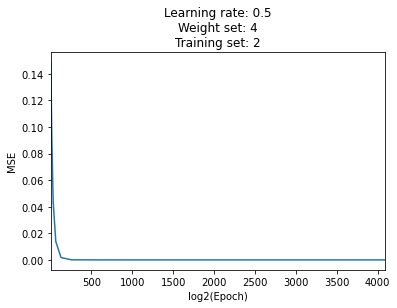

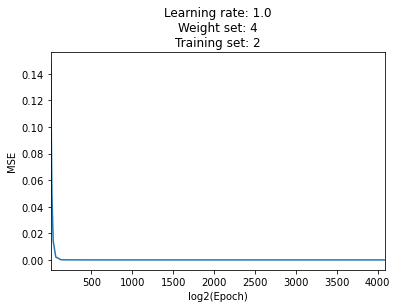

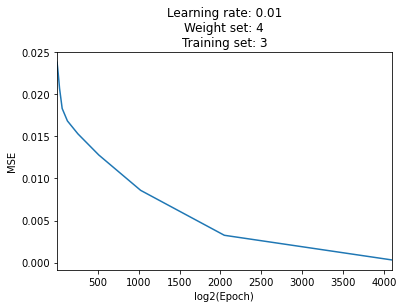

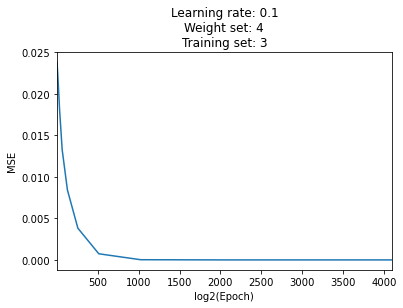

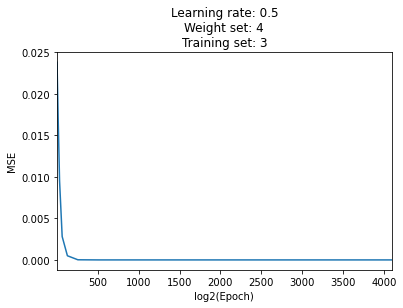

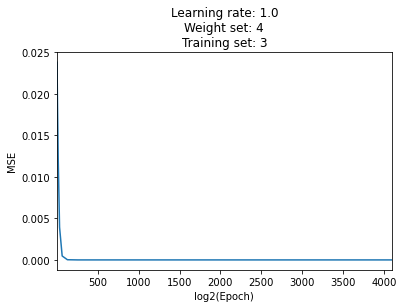

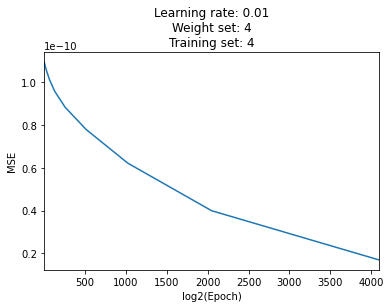

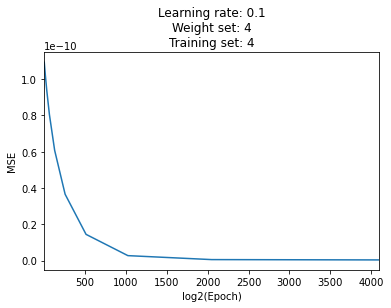

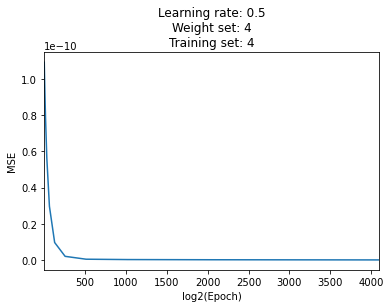

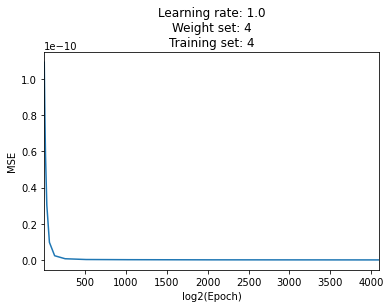

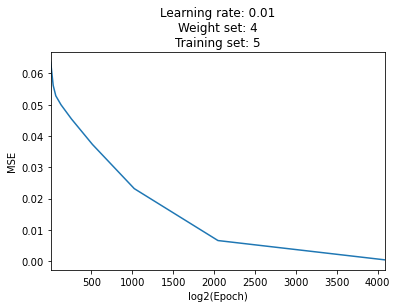

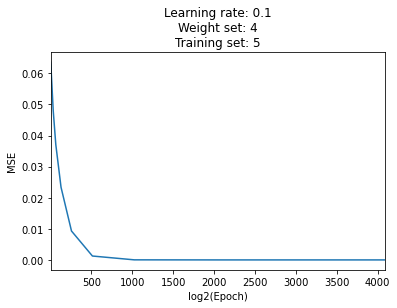

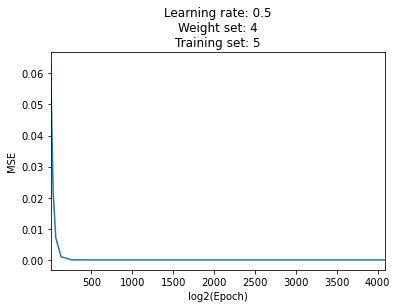

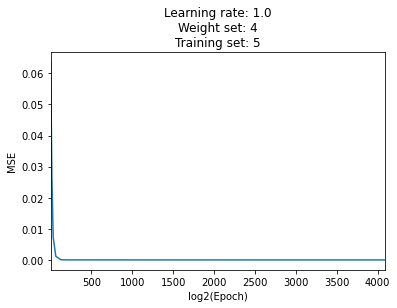

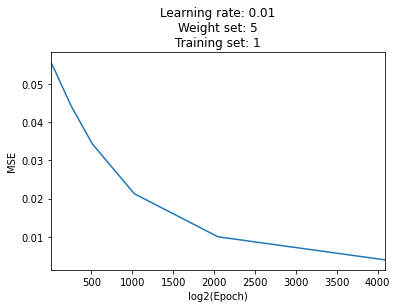

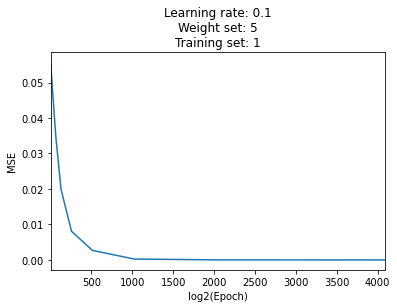

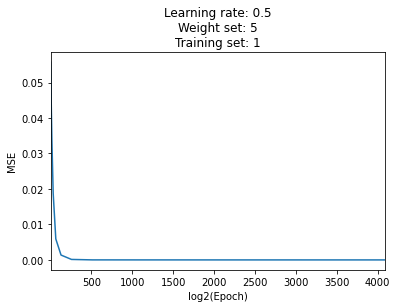

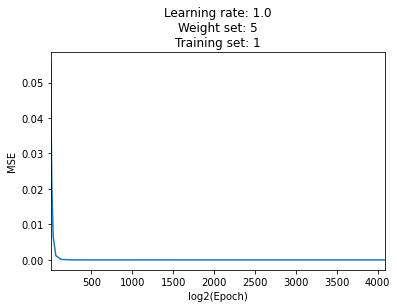

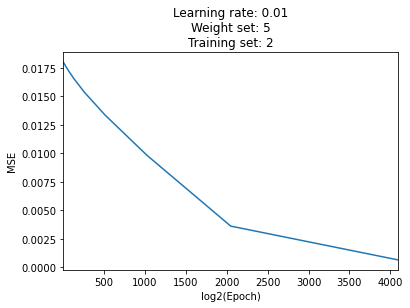

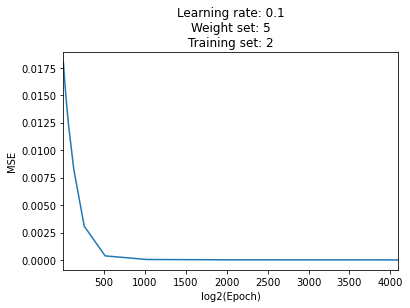

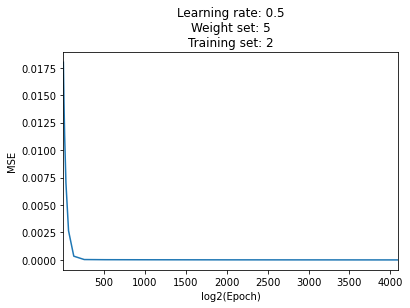

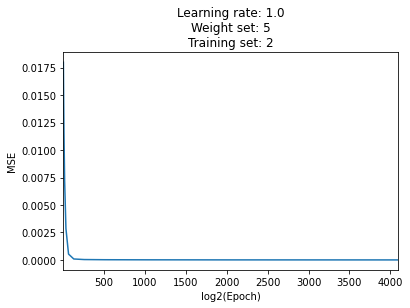

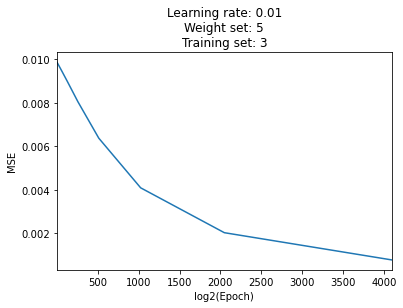

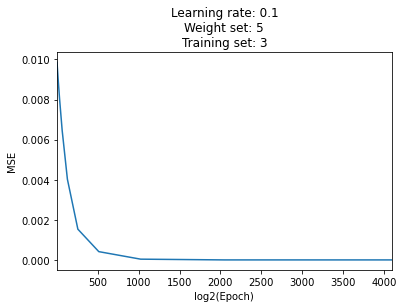

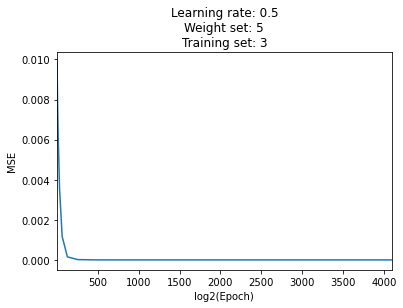

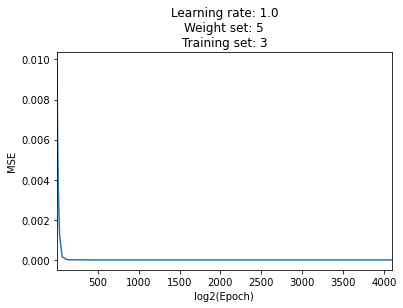

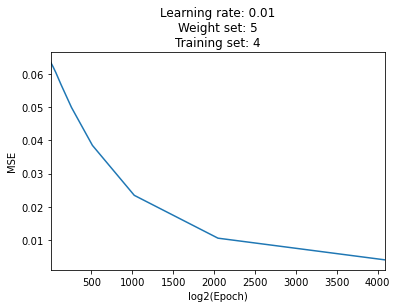

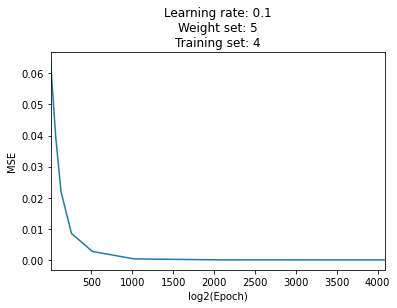

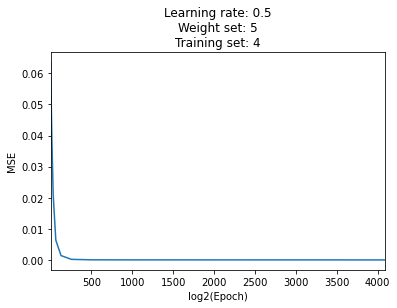

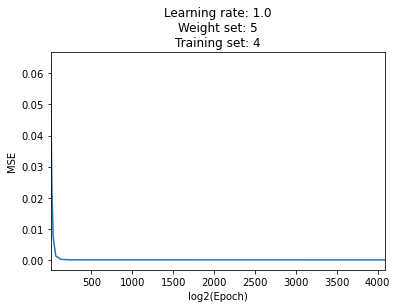

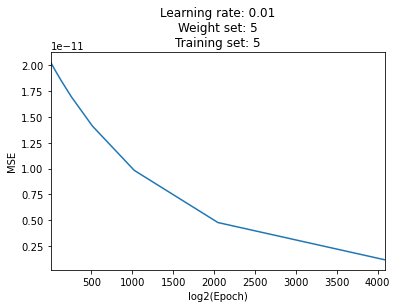

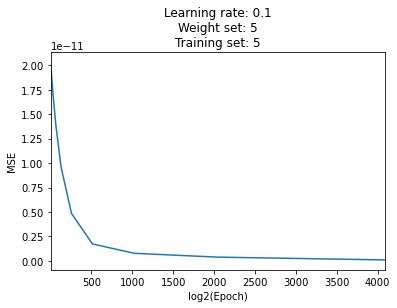

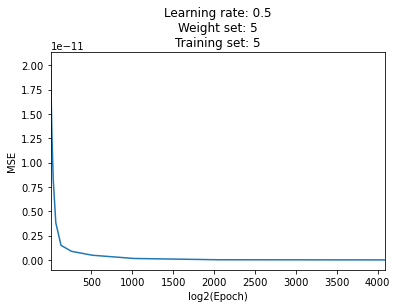

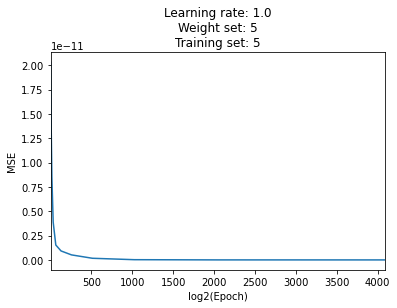

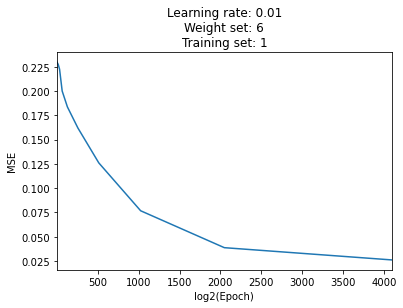

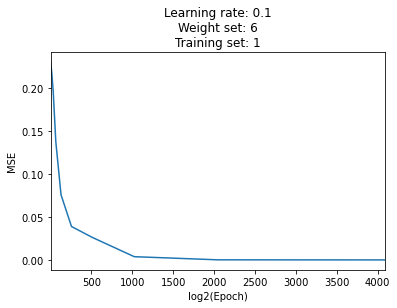

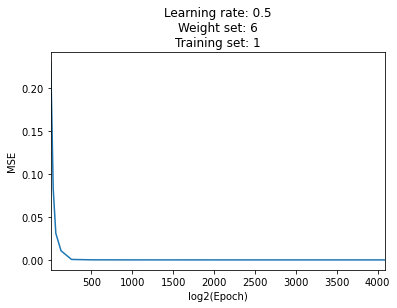

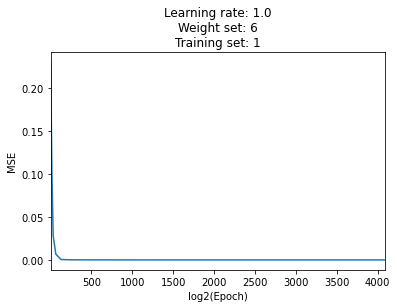

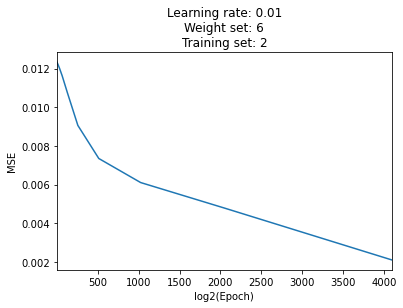

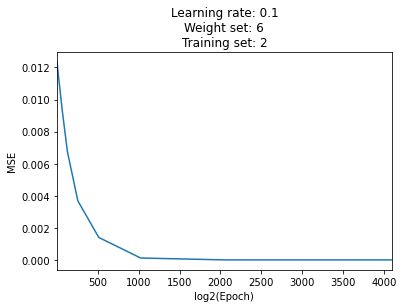

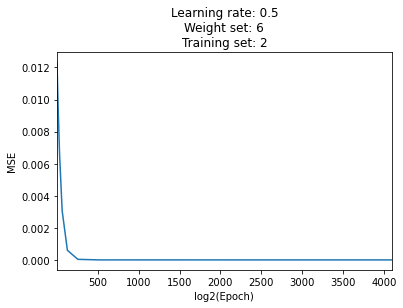

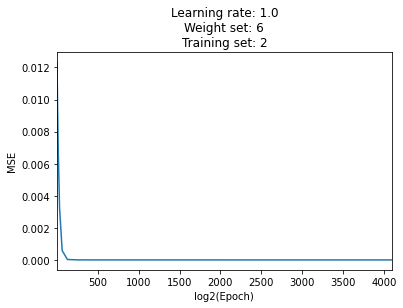

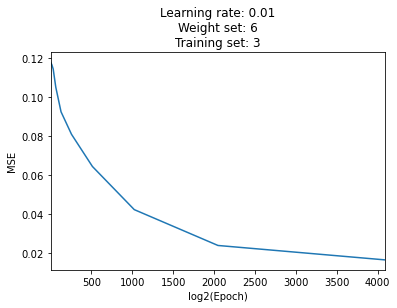

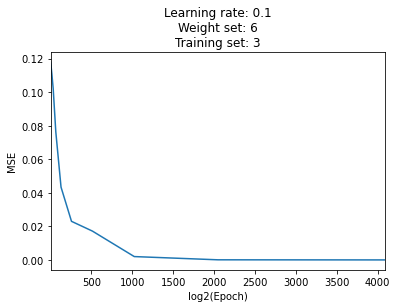

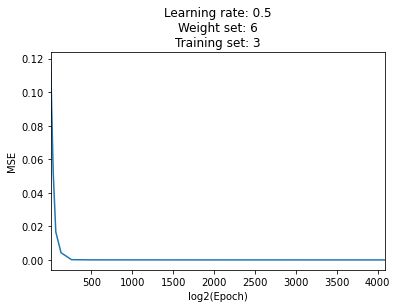

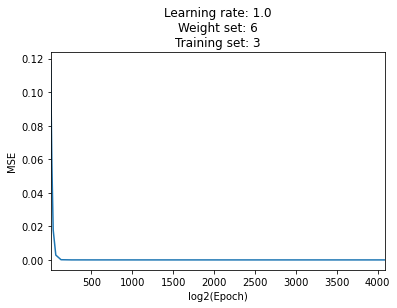

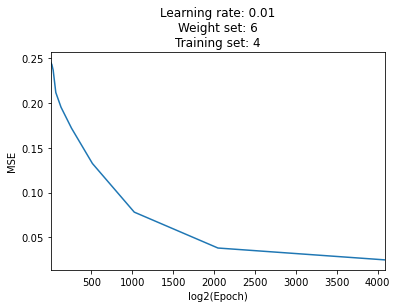

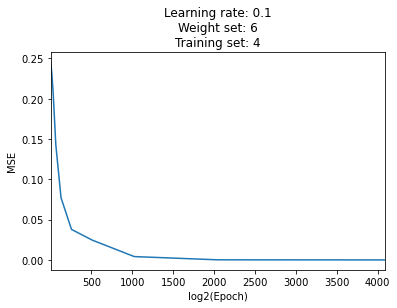

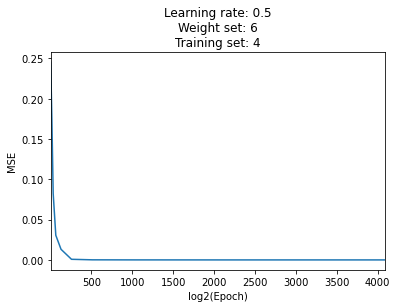

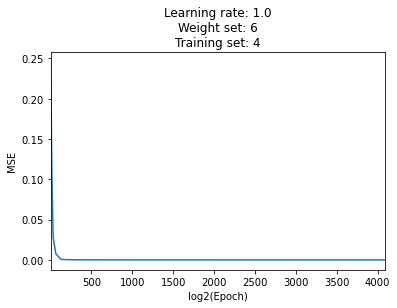

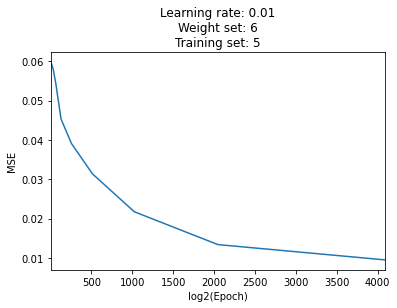

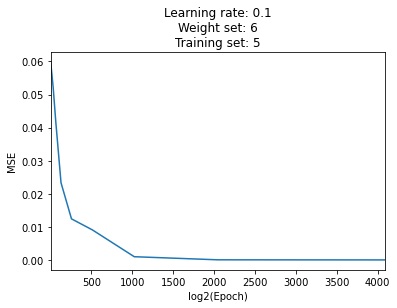

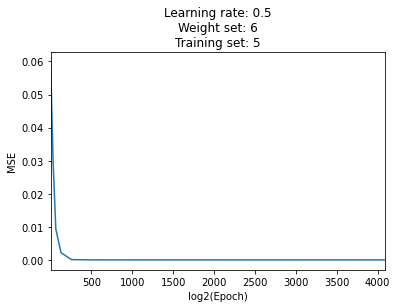

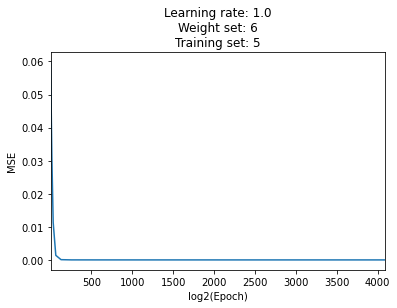

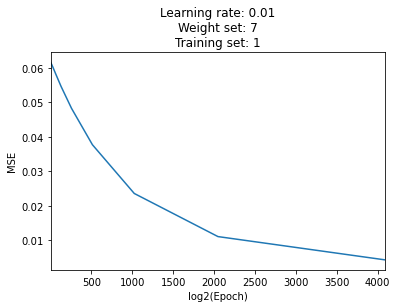

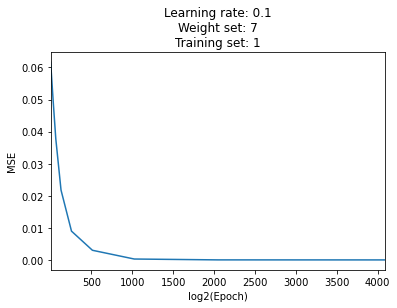

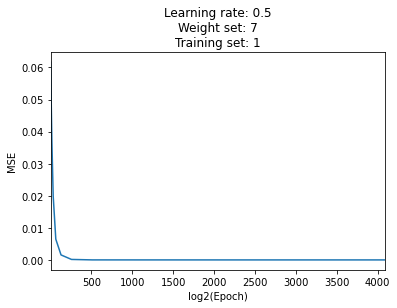

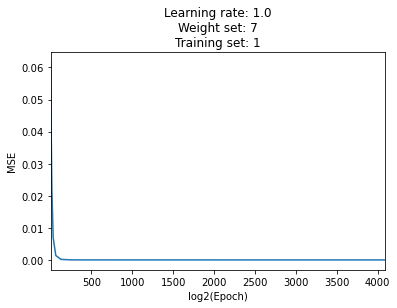

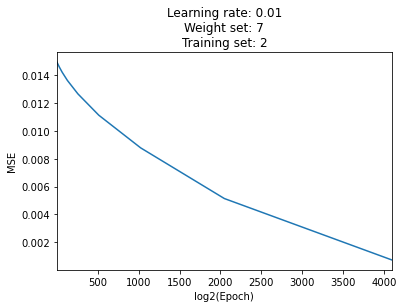

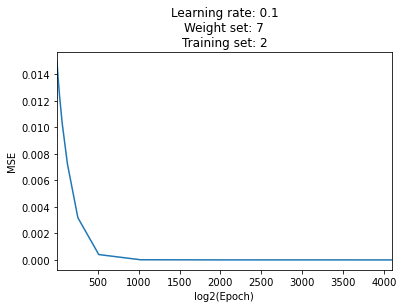

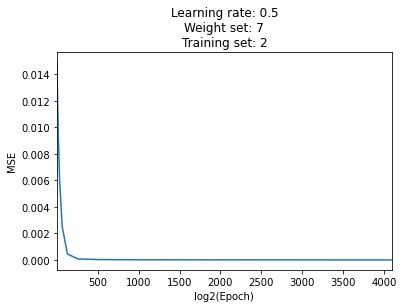

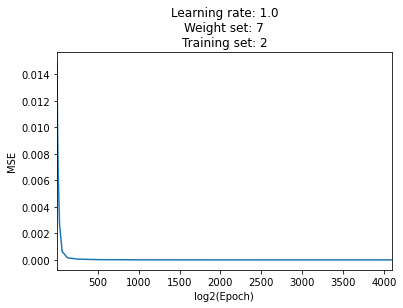

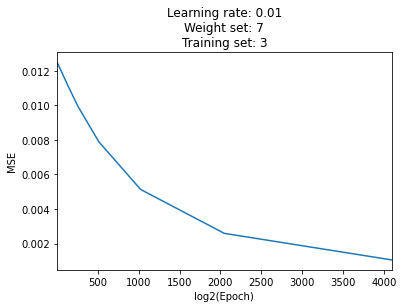

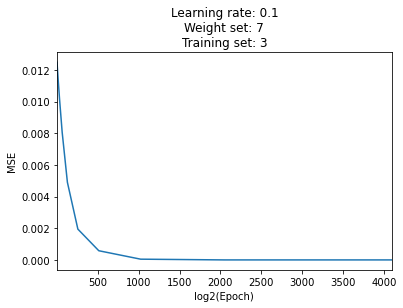

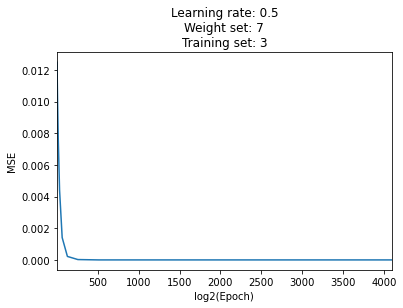

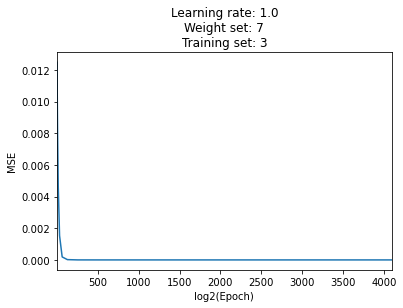

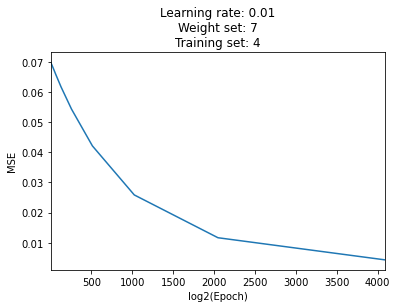

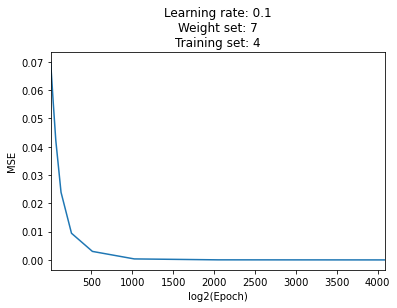

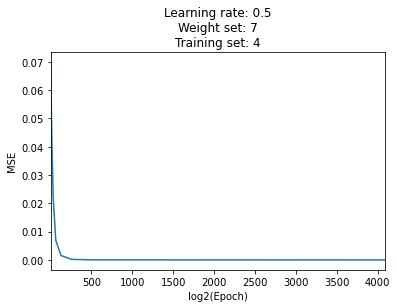

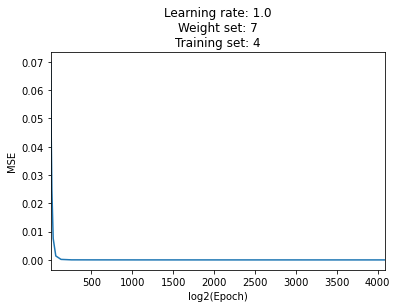

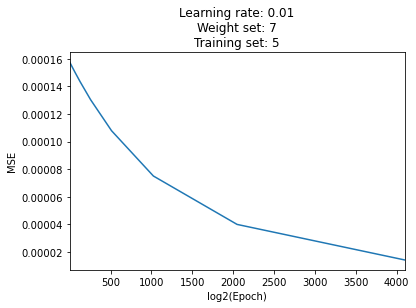

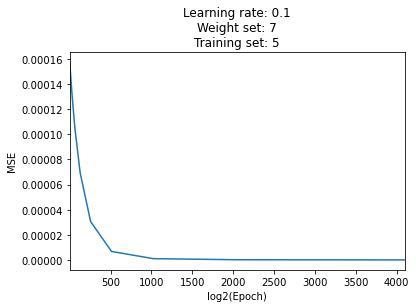

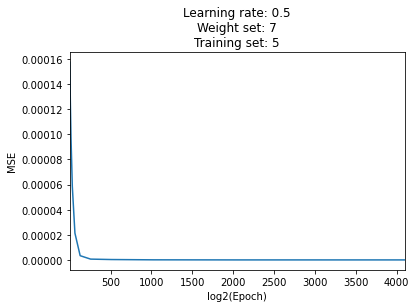

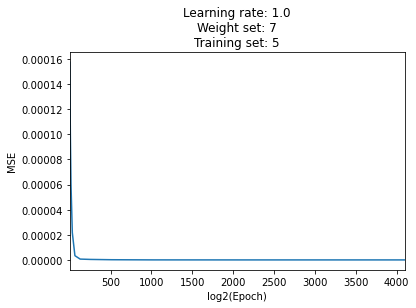

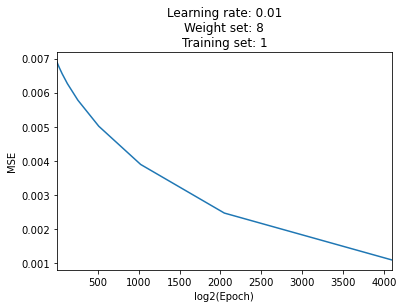

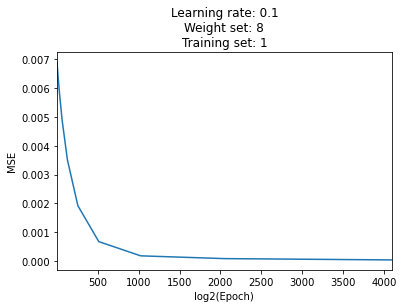

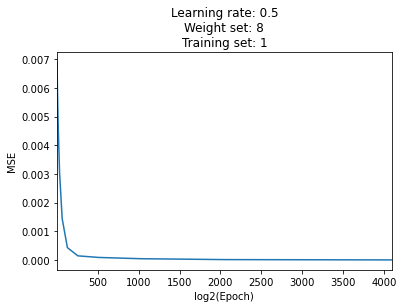

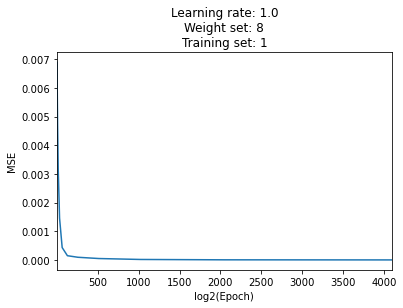

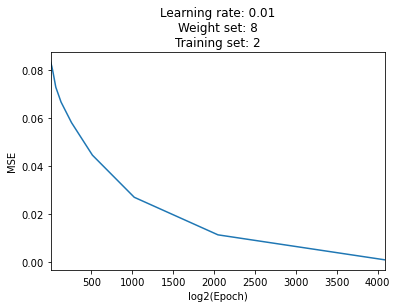

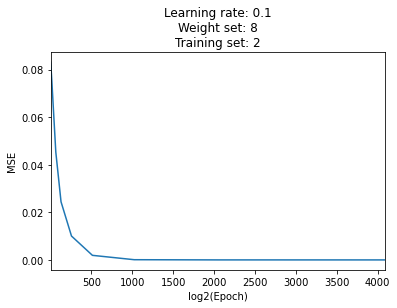

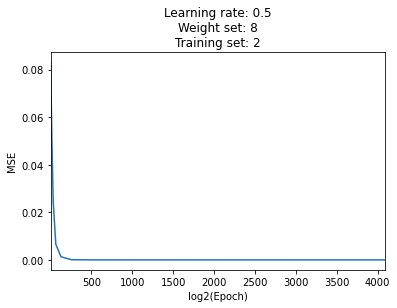

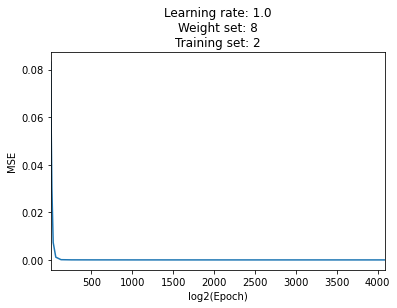

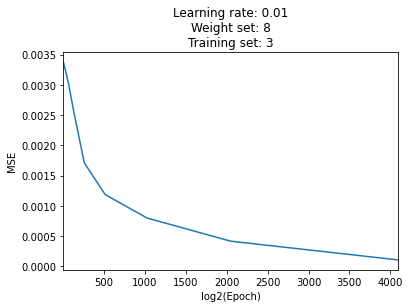

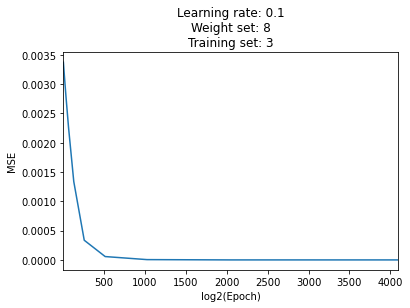

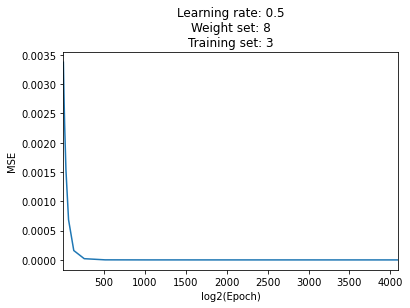

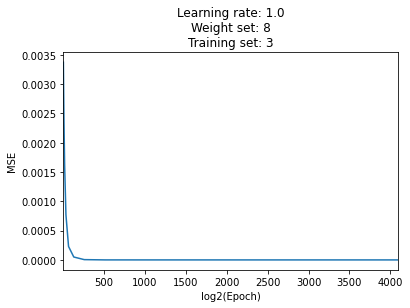

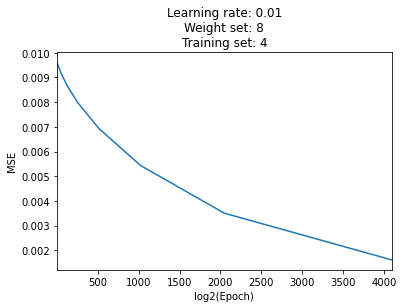

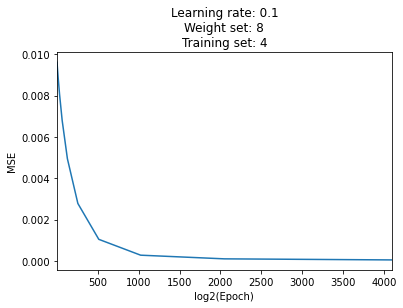

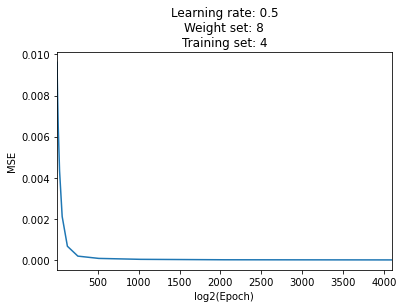

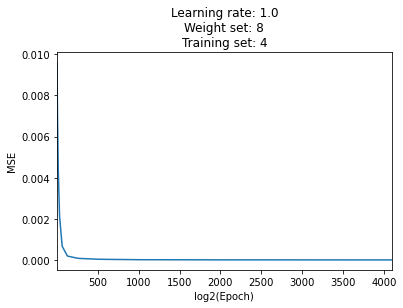

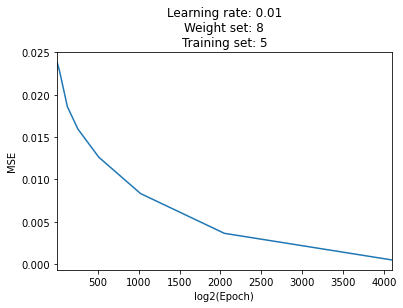

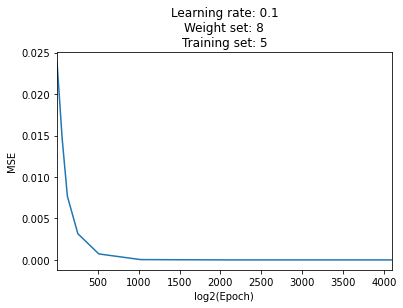

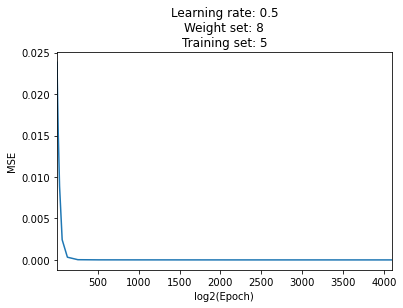

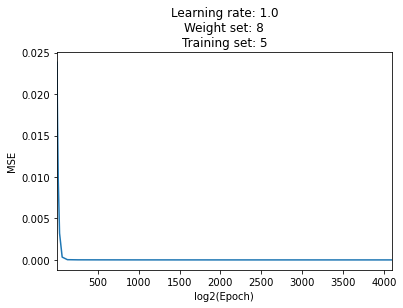

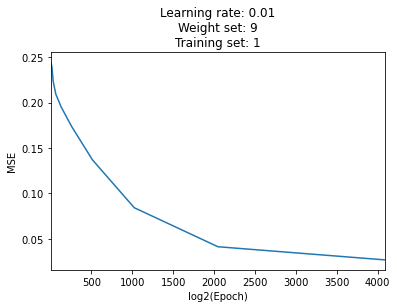

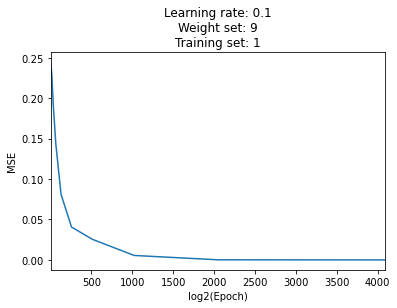

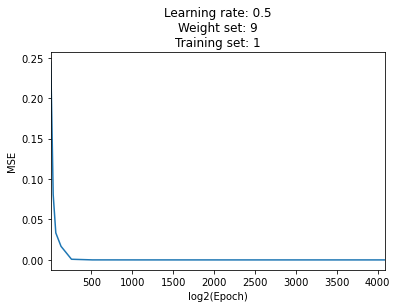

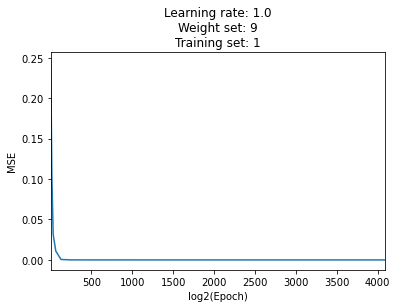

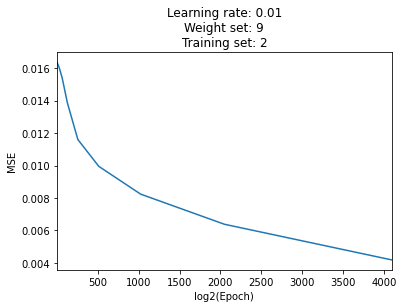

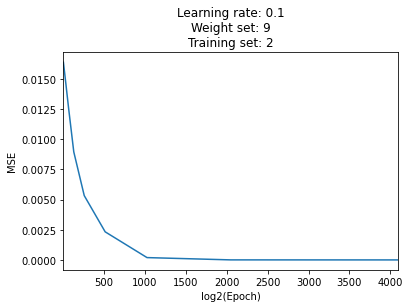

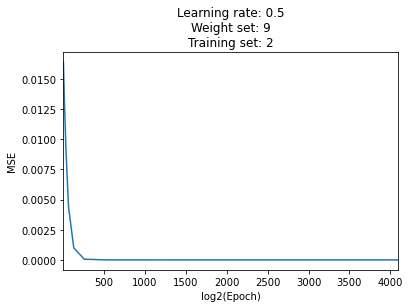

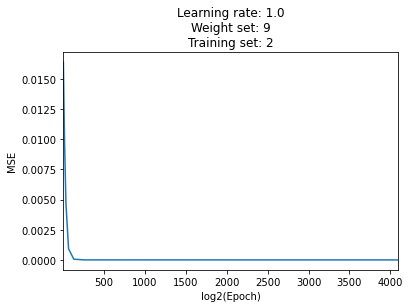

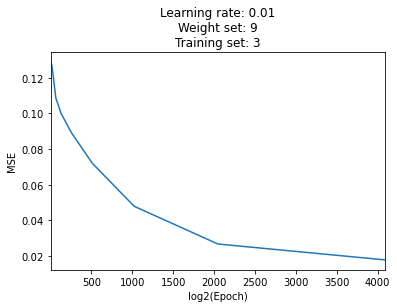

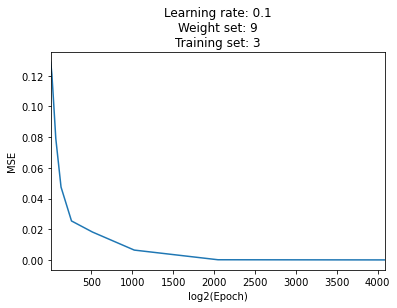

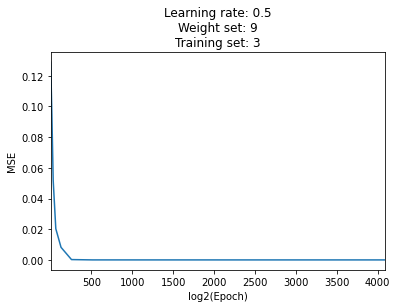

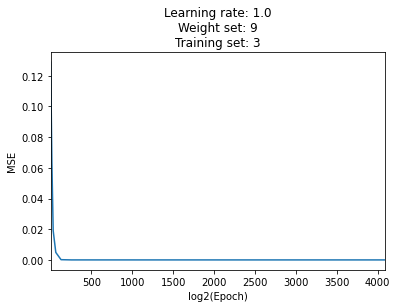

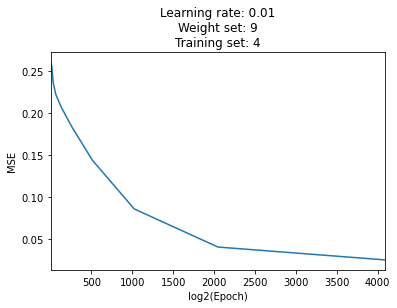

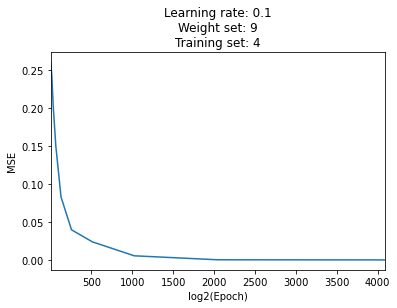

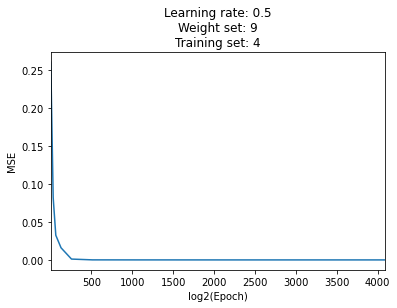

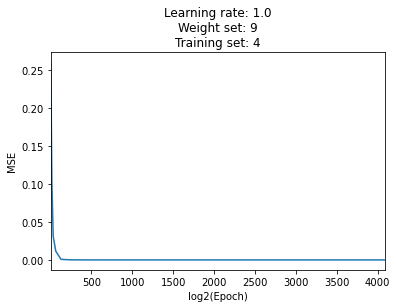

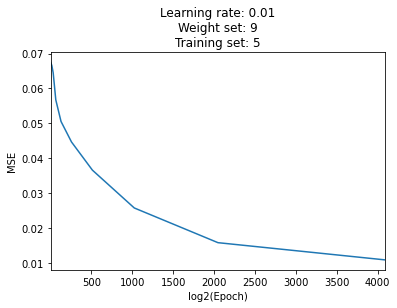

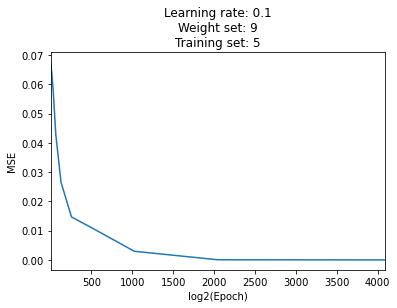

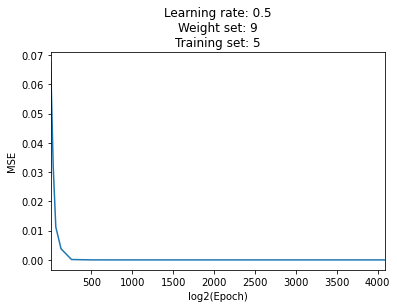

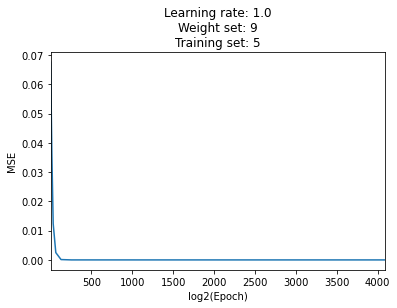

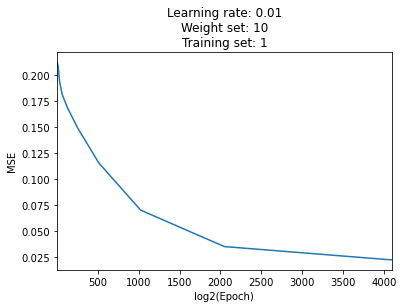

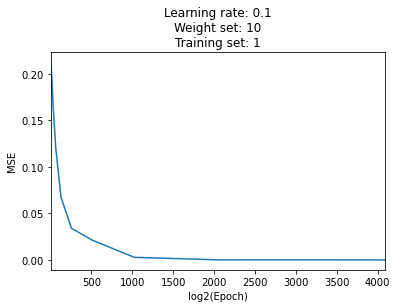

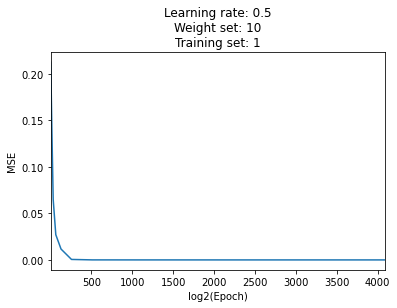

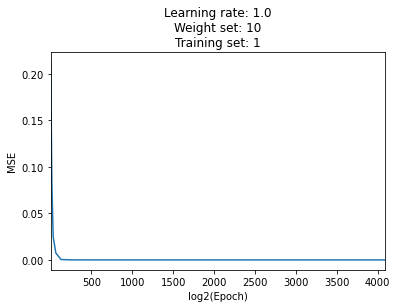

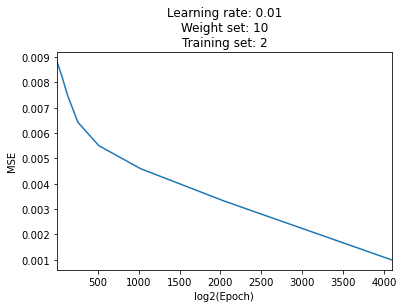

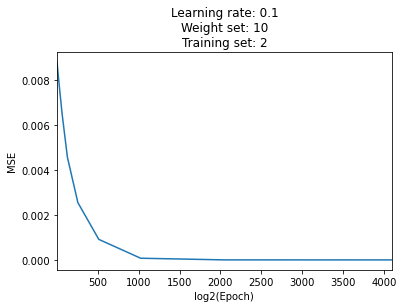

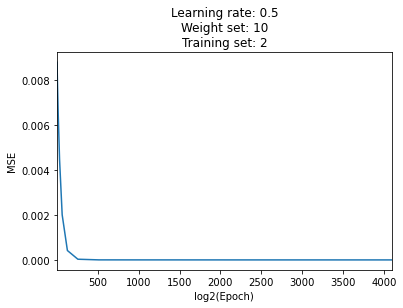

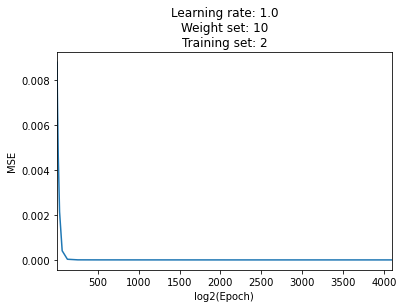

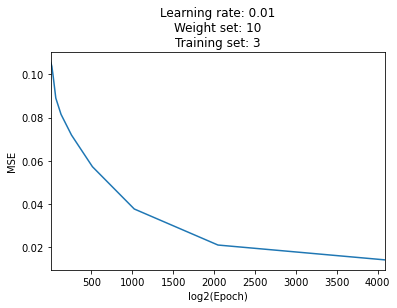

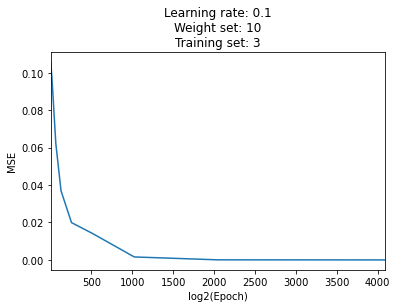

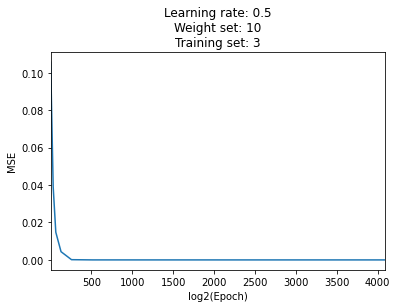

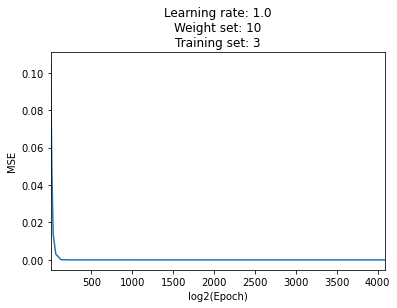

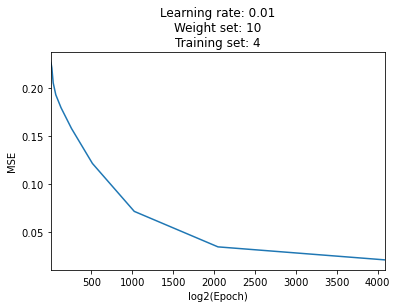

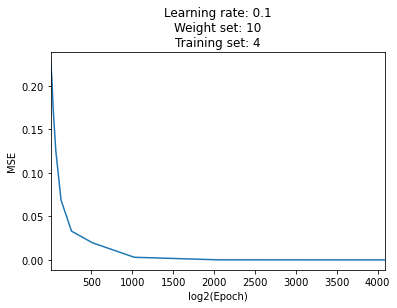

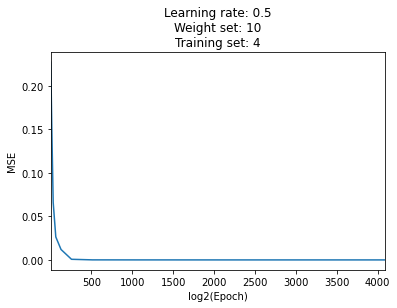

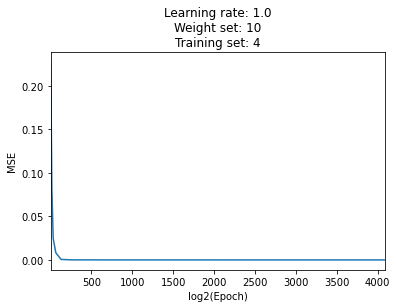

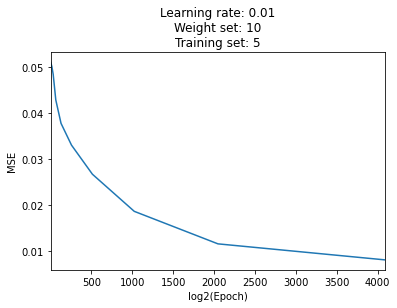

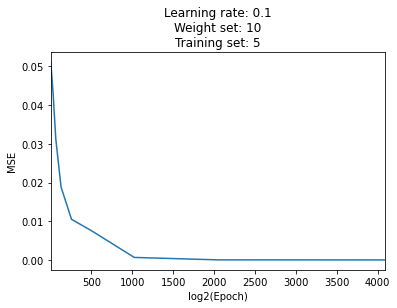

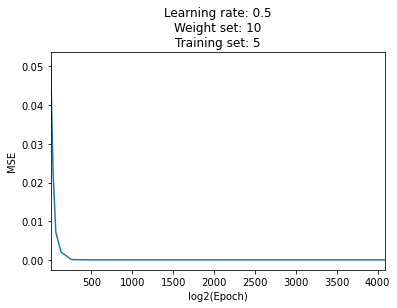

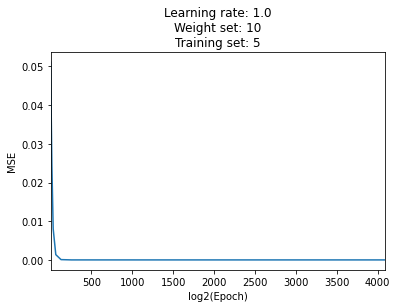

In [11]:
index = 0

print("results")

for w in range (len(weight_set)):
    for t in range(len(training_set)):
        for l in range(len(learningRateList)):
                    
                    title =  "Learning rate: %s" % (learningRateList[l]) + "\n" + "Weight set: %s" % (w+1) + "\n" + "Training set: %s" % (t+1) 

                    x_axis = epoch_list[index]
                    y_axis = error_list[index]

                    ax = plt.axes()
                    plt.plot(x_axis, y_axis)
                    plt.xlabel('log2(Epoch)')
                    plt.ylabel('MSE')
                    plt.title(title)


                    plt.xlim([0.1, max(x_axis)])
                    plt.show()


                    print()

                    index = index + 1



In [12]:
# testing algorithm

# for log2 error / epoch

output_list = [] # this will be target values


# wa:-0.002149562506461501|wb:0.022158002929509125|w0:-0.09079335796573383

test_x = np.array(testing['x'])
test_y = np.array(testing['y'])
ex1 = np.array(testing['Test set 1'])
ex2 = np.array(testing['Test set 2'])
ex3 = np.array(testing['Test set 3'])
ex4 = np.array(testing['Test set 4'])
ex5 = np.array(testing['Test set 5'])


testing_set = [ex1, ex2, ex3, ex5]



for t in range (len(testing_set)):
            
     
            # Learning rate: 0.01 

            # Weight set: 1 | 
            # Training set: 5 |             
            #             Epoch 512:|Error:0.0016292418472440492
            #             Weight w01, wa1, wb1: [-0.4715  0.1904  0.6619]  
            #             Weight w02, wa2, wb2: [ 0.4715 -0.1904 -0.6619]  
            #             Weight w0, w1,w2: [-0.943      -0.4715      0.47149493]


            WU1 = weight_set[w][0]
            W01 = -0.4715
            WA1 =  0.1904
            WB1 = 0.6619


            WU2 = weight_set[w][1]
            W02 =  0.4715
            WA2 = -0.1904
            WB2 = -0.6619


            WU3 = weight_set[w][2]
            W0 = -0.943
            W1 = -0.4715 
            W2 =  0.47149493

      

            
            # forward pass
            # start from input 


            Z1 = np.add((np.add(np.dot(x, WA1), np.dot(y,WB1))), np.dot(b, W01))
            U1 = sigmoid(Z1)
            E1 = np.subtract(U1, training_set[t])

            Z2 = np.add((np.add(np.dot(x, WA2), np.dot(y,WB2))), np.dot(b, W02))
            U2 = sigmoid(Z2)
            E2 = np.subtract(U2, training_set[t])



            Z3 = np.add((np.add(np.dot(U1, W1), np.dot(U2,W2))), np.dot(b, W0))
            U3 = sigmoid(Z3)
            E3 =  np.subtract(U3, training_set[t])

            
            mse = np.sum(np.square(E3))/n
            file = open("testResult.txt", "a")               
    
           
            file.write("Testing Set: %s" % (t+1))
            file.write("\n")
            file.write("MSE: %s" %(mse))
            file.write("\n")
            file.write("\n")
            file.flush() 
            